# Homework 1: Completely Randomized Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: September 12, 2025**

**INSTRUCTIONS:** You are a quality control analyst for a craft brewery experimenting with a new India Pale Ale (IPA). One key quality attribute of IPA is its bitterness, measured in International Bitterness Units (IBUs). The brewery wants to determine if the aging time (3, 4, or 5 weeks) affects the IBUs of the beer. To test this, the brewing team brews a single batch of the experimental IPA and divides it into aging tanks, with each tank randomly assigned to be aged for 3, 4, or 5 weeks. After aging, the IBUs of ten randomly selected bottles from each aging time are measured using a spectrophotometer. The data are in the file `IPA.xlsx`. With these data, I want you to:

**Question 1.** Briefly define the objective of this experiment

A. Determine whether **aging time (3, 4, 5 weeks)** changes the beer’s **mean IBU (bitterness)**.

**Question 2.** Specify the outcome variable

A. **IBU** measured per bottle with a spectrophotometer.

**Question 3.** Specify the independent variable. What are some possible lurking variables?

A. Independent variable: **Aging time** with three levels (3, 4, 5 weeks).  
Possible lurking variables: tank temperature/oxygen exposure, tank-to-tank differences, measurement error, bottle position in tank, contamination, sampling time, or residual variation in the split batch.


**Question 4.** Briefly explain why a completely randomized design is appropriate for this experiment.

A. All bottles come from a **single batch** and are **randomly assigned** to 3/4/5 weeks; units are otherwise similar, so a completely randomized design is appropriate.

**Question 5.** State the null and alternative hypotheses for this experiment.

- H₀: μ₃w = μ₄w = μ₅w  
- H₁: At least one mean differs.



**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?


Head of data:
     Aging    IBU
0  3 Weeks  51.71
1  3 Weeks  43.53
2  3 Weeks  47.25
3  3 Weeks  41.57
4  3 Weeks  46.27

Summary statistics:
         count    mean        std    min      25%     50%     75%    max
Aging                                                                   
3 Weeks   10.0  45.657   5.548563  39.04  42.0600  44.255  47.005  57.75
4 Weeks   10.0  60.164  10.390411  44.56  55.5325  60.940  64.625  81.99
5 Weeks   10.0  71.791  12.627946  48.93  63.0475  71.465  81.100  90.32


/tmp/ipython-input-2367319193.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=sorted(df["Aging"].unique()))


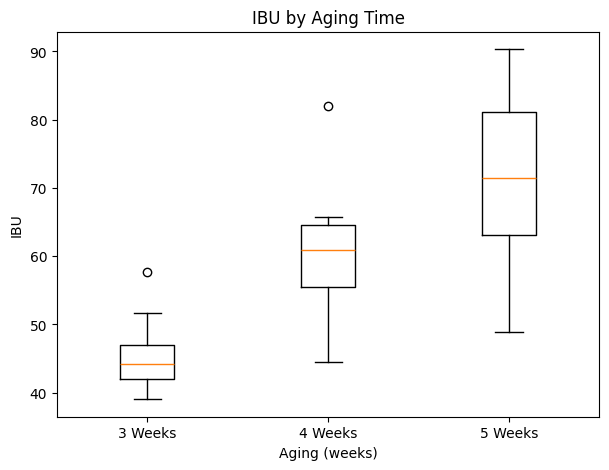


Means ± 95% CI:
     Aging    Mean   CI Lower   CI Upper   n
0  3 Weeks  45.657  41.687797  49.626203  10
1  4 Weeks  60.164  52.731147  67.596853  10
2  5 Weeks  71.791  62.757512  80.824488  10


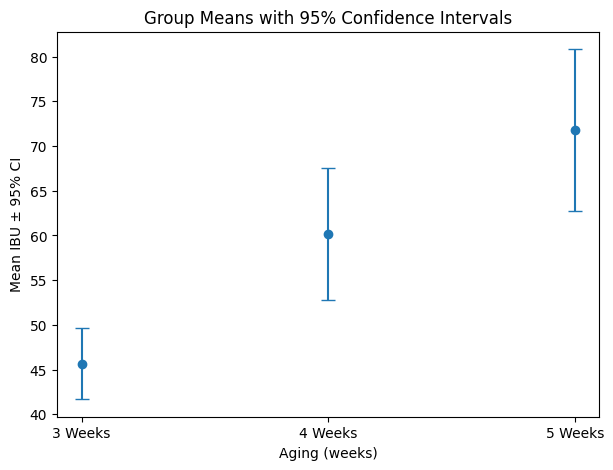

In [2]:
# Homework 1: Completely Randomized Designs – IPA Bitterness (IBUs)

# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load data (directly from GitHub raw URL)
url = "https://raw.githubusercontent.com/AdityaX0820/STAT-7220-Applied-Experimental-Design/main/Assignments/HW1/IPA.xlsx"
df = pd.read_excel(url)

# Detect columns
col_age = None
col_ibu = None
for c in df.columns:
    cl = c.lower()
    if "age" in cl or "week" in cl:
        col_age = c
    if "ibu" in cl:
        col_ibu = c

df = df[[col_age, col_ibu]].copy()
df.columns = ["Aging", "IBU"]
df["Aging"] = df["Aging"].astype(str)

print("Head of data:")
print(df.head())

# --- Question 6: Exploratory Analysis ---
print("\nSummary statistics:")
print(df.groupby("Aging")["IBU"].describe())

# Boxplot
plt.figure(figsize=(7,5))
groups = [df.loc[df["Aging"]==lvl, "IBU"] for lvl in sorted(df["Aging"].unique())]
plt.boxplot(groups, labels=sorted(df["Aging"].unique()))
plt.xlabel("Aging (weeks)")
plt.ylabel("IBU")
plt.title("IBU by Aging Time")
plt.show()

# Means with 95% CI
def mean_ci(a, alpha=0.05):
    n = len(a)
    m = np.mean(a)
    se = stats.sem(a)
    h = stats.t.ppf(1 - alpha/2, n-1) * se
    return m, m-h, m+h

summary = []
levels = sorted(df["Aging"].unique())
for lvl in levels:
    a = df.loc[df["Aging"]==lvl, "IBU"]
    m, lo, hi = mean_ci(a)
    summary.append((lvl, m, lo, hi, len(a)))
summary_df = pd.DataFrame(summary, columns=["Aging","Mean","CI Lower","CI Upper","n"])
print("\nMeans ± 95% CI:")
print(summary_df)

plt.figure(figsize=(7,5))
x = np.arange(len(levels))
means = summary_df["Mean"]
los = means - summary_df["CI Lower"]
his = summary_df["CI Upper"] - means
plt.errorbar(x, means, yerr=[los, his], fmt="o", capsize=5)
plt.xticks(x, levels)
plt.xlabel("Aging (weeks)")
plt.ylabel("Mean IBU ± 95% CI")
plt.title("Group Means with 95% Confidence Intervals")
plt.show()

**Question 7.** Build a one-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?




ANOVA Table:
              sum_sq    df          F    PR(>F)
C(Aging)  3428.75378   2.0  17.246546  0.000015
Residual  2683.90994  27.0        NaN       NaN


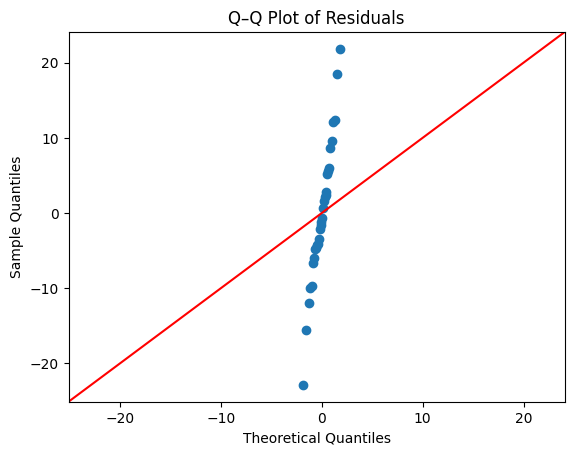

Shapiro–Wilk test: W=0.9877, p=0.9734


In [3]:
# --- Question 7: ANOVA + Normality ---
df["Aging"] = df["Aging"].astype("category")
model = smf.ols("IBU ~ C(Aging)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Table:")
print(anova_table)

resid = model.resid
fitted = model.fittedvalues

# Q–Q Plot
sm.qqplot(resid, line="45")
plt.title("Q–Q Plot of Residuals")
plt.show()

# Shapiro–Wilk
shapiro_stat, shapiro_p = stats.shapiro(resid)
print(f"Shapiro–Wilk test: W={shapiro_stat:.4f}, p={shapiro_p:.4g}")

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

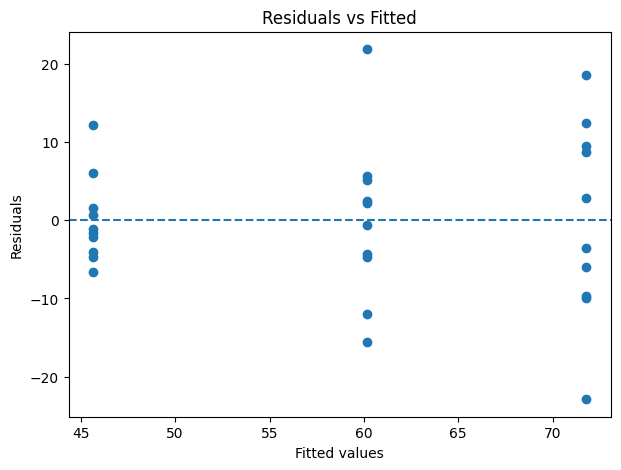

Levene’s test: W=3.1377, p=0.05953
Bartlett’s test: K²=5.2909, p=0.07097


In [4]:
# --- Question 8: Homogeneity of variance ---
plt.figure(figsize=(7,5))
plt.scatter(fitted, resid)
plt.axhline(0, linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

groups = [df.loc[df["Aging"]==lvl, "IBU"] for lvl in df["Aging"].cat.categories]

lev_stat, lev_p = stats.levene(*groups, center="median")
print(f"Levene’s test: W={lev_stat:.4f}, p={lev_p:.4g}")

bart_stat, bart_p = stats.bartlett(*groups)
print(f"Bartlett’s test: K²={bart_stat:.4f}, p={bart_p:.4g}")

**Question 9.** Report the F-statistic and its associated p-value from the one-way ANOVA model. Which of our two hypotheses is more strongly supported? Why?

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which aging times are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses.